# Overview

* We will analyze two datasets related to Covid-19, Covid-19 World Vaccination Progress by country and Covid -19 death/cases data by country to try.
* We will perfrom hypothesis test to infere if increased Covid-19 vaccination will result in lower Covid-19 case counts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Creating df from both the csv files
covid_cases_df = pd.read_csv('Resource/covid-data.csv')
covid_vacc_df = pd.read_csv('Resource/country_vaccinations.csv')


# updating the df to have columns needed for analysis
covid_vacc_df = covid_vacc_df[['country', 'date', 'iso_code', 'people_vaccinated', \
                               'daily_vaccinations', 'people_vaccinated_per_hundred']]

# converting date object to pandas 'datetime64[ns]' format
covid_vacc_df['date'] = pd.to_datetime(covid_vacc_df['date'])

covid_cases_df = covid_cases_df[['location', 'date', 'iso_code', 'total_cases', 'new_cases', \
                                'total_deaths', 'new_deaths', 'population', 'total_cases_per_million', \
                                 'new_cases_per_million']]

# converting date object to pandas 'datetime64[ns]' format
covid_cases_df['date'] = pd.to_datetime(covid_cases_df['date'])


In [3]:
# Adding total cases per hundred column
covid_cases_df['total_cases_per_hundred'] = (covid_cases_df['total_cases'] / covid_cases_df['population']) * 100

# Dropping the row that contatins world data or continental data
# covid_cases_df = covid_cases_df[~covid_cases_df['iso_code'].str.contains('OWID')]

covid_cases_df = covid_cases_df.reset_index(drop=True)

In [4]:
# Dropping the row that contatins world data or continental data
# covid_vacc_df = covid_vacc_df[~covid_vacc_df['iso_code'].str.contains('OWID')]

In [5]:
# Grouped max vaccination DF on country
max_covid_vacc_df = covid_vacc_df.groupby(['iso_code'], as_index=False).max().\
                        sort_values(by=['people_vaccinated_per_hundred'], ascending=False).reset_index(drop=True)
max_covid_vacc_df

,iso_code,country,date,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
0,GIB,Gibraltar,2022-03-24,42034.0,1068.0,124.76
1,NIU,Niue,2022-03-13,1650.0,87.0,102.23
2,PCN,Pitcairn,2021-09-07,47.0,1.0,100.00
3,ARE,United Arab Emirates,2022-03-29,9890318.0,155312.0,98.99
4,PRT,Portugal,2022-03-10,9663542.0,150867.0,95.04
...,...,...,...,...,...,...
218,YEM,Yemen,2022-03-16,643501.0,10240.0,2.11
219,TCD,Chad,2022-03-18,282003.0,4722.0,1.67
220,HTI,Haiti,2022-03-23,163710.0,5695.0,1.42
221,COD,Democratic Republic of Congo,2022-03-24,853971.0,25961.0,0.92


In [6]:
covid_cases_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred
0,Afghanistan,2020-02-24,AFG,5.0,5.0,NaN,NaN,39835428.0,0.126,0.126,0.000013
1,Afghanistan,2020-02-25,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
2,Afghanistan,2020-02-26,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
3,Afghanistan,2020-02-27,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
4,Afghanistan,2020-02-28,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
...,...,...,...,...,...,...,...,...,...,...,...
166321,Zimbabwe,2022-03-01,ZWE,236871.0,491.0,5395.0,0.0,15092171.0,15694.959,32.533,1.569496
166322,Zimbabwe,2022-03-02,ZWE,237503.0,632.0,5396.0,1.0,15092171.0,15736.835,41.876,1.573683
166323,Zimbabwe,2022-03-03,ZWE,237503.0,0.0,5396.0,0.0,15092171.0,15736.835,0.000,1.573683
166324,Zimbabwe,2022-03-04,ZWE,238739.0,1236.0,5397.0,1.0,15092171.0,15818.731,81.897,1.581873


In [7]:
covid_vacc_df.head(395)

,country,date,iso_code,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
0,Afghanistan,2021-02-22,AFG,0.0,NaN,0.00
1,Afghanistan,2021-02-23,AFG,NaN,1367.0,NaN
2,Afghanistan,2021-02-24,AFG,NaN,1367.0,NaN
3,Afghanistan,2021-02-25,AFG,NaN,1367.0,NaN
4,Afghanistan,2021-02-26,AFG,NaN,1367.0,NaN
...,...,...,...,...,...,...
390,Afghanistan,2022-03-19,AFG,NaN,9838.0,NaN
391,Afghanistan,2022-03-20,AFG,NaN,8665.0,NaN
392,Afghanistan,2022-03-21,AFG,NaN,7492.0,NaN
393,Afghanistan,2022-03-22,AFG,5082824.0,6319.0,12.76


In [8]:
# Grouped max covid cases DF on country
# Sorting the DF based on total cases per hundred
# Dropping the rows with NAN values for total cases and resetting the index

max_covid_case_df = covid_cases_df.groupby(['iso_code'], as_index=False).max()

sort_covid_case_per_hund_df = max_covid_case_df.drop(['new_cases', 'new_deaths', 'new_cases_per_million'], \
                           axis=1).sort_values(by=['total_cases_per_hundred'], ascending=False).dropna(subset=['total_cases']).reset_index(drop=True)


# Sorting the DF based on total cases
sort_most_covid_case_df = max_covid_case_df.drop(['new_cases', 'new_deaths', 'new_cases_per_million'], \
                           axis=1).sort_values(by=['total_cases'], ascending=False).dropna(subset=['total_cases']).reset_index(drop=True)

In [9]:
# This df shows the most effected countries based on cases per hundred. 
sort_covid_case_per_hund_df

,iso_code,location,date,total_cases,total_deaths,population,total_cases_per_million,total_cases_per_hundred
0,FRO,Faeroe Islands,2022-03-05,34658.0,28.0,4.905300e+04,706541.904,70.654190
1,AND,Andorra,2022-03-05,38434.0,151.0,7.735400e+04,496858.598,49.685860
2,DNK,Denmark,2022-03-05,2853236.0,4830.0,5.813302e+06,490811.590,49.081159
3,GIB,Gibraltar,2022-03-05,15622.0,101.0,3.369100e+04,463684.664,46.368466
4,SVN,Slovenia,2022-03-05,902744.0,6351.0,2.078723e+06,434278.160,43.427816
...,...,...,...,...,...,...,...,...
223,COK,Cook Islands,2022-03-05,2.0,NaN,1.757200e+04,113.817,0.011382
224,CHN,China,2022-03-05,110868.0,4654.0,1.444216e+09,76.767,0.007677
225,VUT,Vanuatu,2022-03-05,19.0,1.0,3.144640e+05,60.420,0.006042
226,FSM,Micronesia (country),2022-03-05,1.0,NaN,1.162550e+05,8.602,0.000860


In [36]:
# This df shows the most effected countries based on most number of total cases. 
sort_most_covid_case_df = sort_most_covid_case_df[~sort_most_covid_case_df['iso_code'].str.contains('OWID')]
sort_most_covid_case_df


,iso_code,location,date,total_cases,total_deaths,population,total_cases_per_million,total_cases_per_hundred
8,USA,United States,2022-03-05,79265726.0,958437.0,3.329151e+08,238095.936,23.809594
10,IND,India,2022-03-05,42962953.0,515036.0,1.393409e+09,30832.980,3.083298
11,BRA,Brazil,2022-03-05,29040800.0,652216.0,2.139934e+08,135708.832,13.570883
12,FRA,France,2022-03-05,23064766.0,139312.0,6.742200e+07,342095.547,34.209555
13,GBR,United Kingdom,2022-03-05,19172095.0,162152.0,6.820711e+07,281086.442,28.108644
...,...,...,...,...,...,...,...,...
223,VUT,Vanuatu,2022-03-05,19.0,1.0,3.144640e+05,60.420,0.006042
224,MHL,Marshall Islands,2022-03-05,7.0,NaN,5.961800e+04,117.414,0.011741
225,SHN,Saint Helena,2022-03-05,4.0,NaN,6.095000e+03,656.276,0.065628
226,COK,Cook Islands,2022-03-05,2.0,NaN,1.757200e+04,113.817,0.011382


In [11]:
#mergin two dfs on 'iso-code' and 'date'

merge_df = pd.merge(covid_cases_df, covid_vacc_df, on=['iso_code', 'date'], how='outer')

In [12]:
#verfying the merge df

merge_df.loc[(merge_df['iso_code'] == 'AFG') & (merge_df['date'] == '2022-03-22')]

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
166342,NaN,2022-03-22,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,5082824.0,6319.0,12.76


In [13]:
# Dataframes available to use

#1. covid_vacc_df  ---- raw df with required columns for vaccination record
#2. covid_cases_df ---- raw df with required columns for cases record with added column for "total cases per hundred"
                        # plus data for world and continents are removed from it
    
#3. max_covid_vacc_df ---- data is grouped on country and is sorted with the countries with most people vaccinated
#4. sort_covid_case_per_hund_df ---- data is grouped on country and is sorted with the countries with most cases per hundred
#5. sort_most_covid_case_df ---- data is grouped on country and is sorted with the countries with most cases
#6. merge_df ---- its a merged df 'on=['iso_code', 'date']' containg vaccination and cases record. 




# sample plot

In [14]:
isreal_df = merge_df.loc[merge_df['iso_code'] == 'ISR']

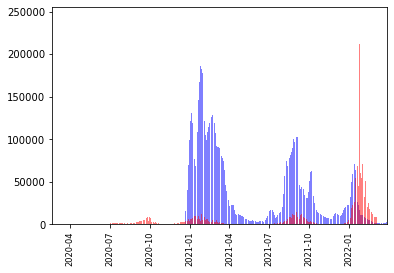

In [15]:


plt.bar(isreal_df['date'], isreal_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(isreal_df['date'], isreal_df['new_cases'], color='r', alpha=0.5)
plt.xlim(isreal_df['date'].min(), isreal_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.show()

In [16]:
isreal_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
74875,Israel,2020-02-20,ISR,NaN,NaN,NaN,NaN,9291000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74876,Israel,2020-02-21,ISR,1.0,1.0,NaN,NaN,9291000.0,0.108,0.108,0.000011,NaN,NaN,NaN,NaN
74877,Israel,2020-02-22,ISR,1.0,0.0,NaN,NaN,9291000.0,0.108,0.000,0.000011,NaN,NaN,NaN,NaN
74878,Israel,2020-02-23,ISR,1.0,0.0,NaN,NaN,9291000.0,0.108,0.000,0.000011,NaN,NaN,NaN,NaN
74879,Israel,2020-02-24,ISR,1.0,0.0,NaN,NaN,9291000.0,0.108,0.000,0.000011,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168556,NaN,2022-03-25,ISR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,6702307.0,1973.0,72.14
168557,NaN,2022-03-26,ISR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,6702318.0,1982.0,72.14
168558,NaN,2022-03-27,ISR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,6702475.0,2290.0,72.14
168559,NaN,2022-03-28,ISR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,6702589.0,2513.0,72.14


In [17]:
isreal_df.loc[isreal_df['new_cases'] == isreal_df['new_cases'].max()]

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
75574,Israel,2022-01-19,ISR,2035425.0,243295.0,8362.0,44.0,9291000.0,219074.911,26186.094,21.907491,Israel,6685973.0,32492.0,71.96


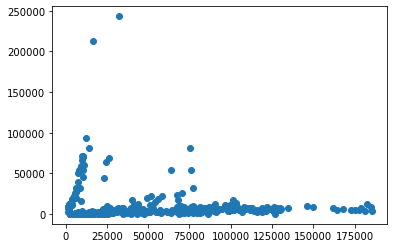

In [18]:
plt.scatter( isreal_df['daily_vaccinations'], isreal_df['new_cases'])

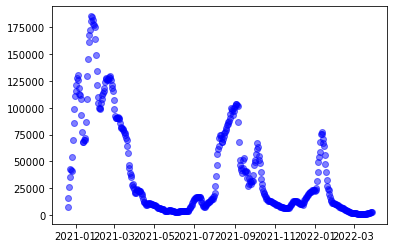

In [19]:
plt.scatter(isreal_df['date'], isreal_df['daily_vaccinations'], color='b', alpha=0.5)

In [20]:
# Displaying data for the country that is the most vaccinated. 
gibraltar_df = merge_df.loc[merge_df['iso_code'] == 'GIB']
gibraltar_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
59005,Gibraltar,2020-03-04,GIB,1.0,1.0,NaN,NaN,33691.0,29.682,29.682,0.002968,NaN,NaN,NaN,NaN
59006,Gibraltar,2020-03-05,GIB,1.0,0.0,NaN,NaN,33691.0,29.682,0.000,0.002968,NaN,NaN,NaN,NaN
59007,Gibraltar,2020-03-06,GIB,1.0,0.0,NaN,NaN,33691.0,29.682,0.000,0.002968,NaN,NaN,NaN,NaN
59008,Gibraltar,2020-03-07,GIB,1.0,0.0,NaN,NaN,33691.0,29.682,0.000,0.002968,NaN,NaN,NaN,NaN
59009,Gibraltar,2020-03-08,GIB,1.0,0.0,NaN,NaN,33691.0,29.682,0.000,0.002968,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168141,NaN,2022-03-20,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gibraltar,NaN,124.0,NaN
168142,NaN,2022-03-21,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gibraltar,42025.0,130.0,124.74
168143,NaN,2022-03-22,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gibraltar,42026.0,166.0,124.74
168144,NaN,2022-03-23,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gibraltar,42028.0,181.0,124.75


In [21]:
# Displaying data for the most vaccinated country from the time that vaccinations began. 
clean_gibraltar_df = gibraltar_df.dropna(subset=["country"])
clean_gibraltar_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
59317,Gibraltar,2021-01-10,GIB,3170.0,61.0,16.0,4.0,33691.0,94090.410,1810.573,9.409041,Gibraltar,420.0,NaN,1.25
59318,Gibraltar,2021-01-11,GIB,3240.0,70.0,16.0,0.0,33691.0,96168.116,2077.706,9.616812,Gibraltar,1445.0,1025.0,4.29
59319,Gibraltar,2021-01-12,GIB,3324.0,84.0,17.0,1.0,33691.0,98661.364,2493.247,9.866136,Gibraltar,2501.0,1040.0,7.42
59320,Gibraltar,2021-01-13,GIB,3431.0,107.0,20.0,3.0,33691.0,101837.286,3175.922,10.183729,Gibraltar,NaN,986.0,NaN
59321,Gibraltar,2021-01-14,GIB,3509.0,78.0,25.0,5.0,33691.0,104152.444,2315.158,10.415244,Gibraltar,NaN,959.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168141,NaN,2022-03-20,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gibraltar,NaN,124.0,NaN
168142,NaN,2022-03-21,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gibraltar,42025.0,130.0,124.74
168143,NaN,2022-03-22,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gibraltar,42026.0,166.0,124.74
168144,NaN,2022-03-23,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gibraltar,42028.0,181.0,124.75


In [22]:
# Displaying data for the country that is the least vaccinated. 
burundi_df = merge_df.loc[merge_df["iso_code"] == "BDI"]
burundi_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
24937,Burundi,2020-03-31,BDI,2.0,2.0,NaN,NaN,12255429.0,0.163,0.163,0.000016,NaN,NaN,NaN,NaN
24938,Burundi,2020-04-01,BDI,2.0,0.0,NaN,NaN,12255429.0,0.163,0.000,0.000016,NaN,NaN,NaN,NaN
24939,Burundi,2020-04-02,BDI,3.0,1.0,NaN,NaN,12255429.0,0.245,0.082,0.000024,NaN,NaN,NaN,NaN
24940,Burundi,2020-04-03,BDI,3.0,0.0,NaN,NaN,12255429.0,0.245,0.000,0.000024,NaN,NaN,NaN,NaN
24941,Burundi,2020-04-04,BDI,3.0,0.0,NaN,NaN,12255429.0,0.245,0.000,0.000024,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166875,NaN,2022-03-14,BDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burundi,NaN,47.0,NaN
166876,NaN,2022-03-15,BDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burundi,NaN,47.0,NaN
166877,NaN,2022-03-16,BDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burundi,NaN,48.0,NaN
166878,NaN,2022-03-17,BDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burundi,NaN,49.0,NaN


In [23]:
# Displaying data for the least vaccinated country from the time that vaccinations began. 
clean_burundi_df = burundi_df.dropna(subset=["country"])
clean_burundi_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
25504,Burundi,2021-10-19,BDI,19745.0,15.0,38.0,0.0,12255429.0,1611.123,1.224,0.161112,Burundi,81.0,NaN,0.00
25505,Burundi,2021-10-20,BDI,19819.0,74.0,38.0,0.0,12255429.0,1617.161,6.038,0.161716,Burundi,175.0,94.0,0.00
25506,Burundi,2021-10-21,BDI,19867.0,48.0,38.0,0.0,12255429.0,1621.077,3.917,0.162108,Burundi,NaN,75.0,NaN
25507,Burundi,2021-10-22,BDI,19894.0,27.0,38.0,0.0,12255429.0,1623.281,2.203,0.162328,Burundi,287.0,69.0,0.00
25508,Burundi,2021-10-23,BDI,19894.0,0.0,38.0,0.0,12255429.0,1623.281,0.000,0.162328,Burundi,NaN,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166875,NaN,2022-03-14,BDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burundi,NaN,47.0,NaN
166876,NaN,2022-03-15,BDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burundi,NaN,47.0,NaN
166877,NaN,2022-03-16,BDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burundi,NaN,48.0,NaN
166878,NaN,2022-03-17,BDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burundi,NaN,49.0,NaN


In [24]:
# Performing an independent t-test for the most and least vaccinated countries to test the hypothesis. 
stats.ttest_ind(clean_gibraltar_df["new_cases_per_million"], clean_burundi_df["new_cases_per_million"], nan_policy='omit')

Ttest_indResult(statistic=7.6541092436968, pvalue=8.76880454371016e-14)

In [37]:
# Displaying countries with the highest rates of COVID-19 cases. 
sort_most_covid_case_df


,iso_code,location,date,total_cases,total_deaths,population,total_cases_per_million,total_cases_per_hundred
8,USA,United States,2022-03-05,79265726.0,958437.0,3.329151e+08,238095.936,23.809594
10,IND,India,2022-03-05,42962953.0,515036.0,1.393409e+09,30832.980,3.083298
11,BRA,Brazil,2022-03-05,29040800.0,652216.0,2.139934e+08,135708.832,13.570883
12,FRA,France,2022-03-05,23064766.0,139312.0,6.742200e+07,342095.547,34.209555
13,GBR,United Kingdom,2022-03-05,19172095.0,162152.0,6.820711e+07,281086.442,28.108644
...,...,...,...,...,...,...,...,...
223,VUT,Vanuatu,2022-03-05,19.0,1.0,3.144640e+05,60.420,0.006042
224,MHL,Marshall Islands,2022-03-05,7.0,NaN,5.961800e+04,117.414,0.011741
225,SHN,Saint Helena,2022-03-05,4.0,NaN,6.095000e+03,656.276,0.065628
226,COK,Cook Islands,2022-03-05,2.0,NaN,1.757200e+04,113.817,0.011382


In [26]:
# Displaying data for the country with the highest total number of cases. 
usa_df = merge_df.loc[merge_df["iso_code"] == "USA"]
usa_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
157222,United States,2020-01-22,USA,1.0,NaN,NaN,NaN,332915074.0,0.003,NaN,3.003769e-07,NaN,NaN,NaN,NaN
157223,United States,2020-01-23,USA,1.0,0.0,NaN,NaN,332915074.0,0.003,0.000,3.003769e-07,NaN,NaN,NaN,NaN
157224,United States,2020-01-24,USA,2.0,1.0,NaN,NaN,332915074.0,0.006,0.003,6.007538e-07,NaN,NaN,NaN,NaN
157225,United States,2020-01-25,USA,2.0,0.0,NaN,NaN,332915074.0,0.006,0.000,6.007538e-07,NaN,NaN,NaN,NaN
157226,United States,2020-01-26,USA,5.0,3.0,NaN,NaN,332915074.0,0.015,0.009,1.501885e-06,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171535,NaN,2022-03-24,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,255273235.0,156889.0,76.89
171536,NaN,2022-03-25,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,255322519.0,149541.0,76.90
171537,NaN,2022-03-26,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,255348742.0,143396.0,76.91
171538,NaN,2022-03-27,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,255357149.0,137525.0,76.91


In [27]:
# Displaying data for the country with the highest total number of cases from the time that vaccinations began. 
clean_usa_df = usa_df.dropna(subset=["country"])
clean_usa_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
157548,United States,2020-12-13,USA,16409655.0,191829.0,303465.0,1659.0,332915074.0,49290.814,576.210,4.929081,United States,25125.0,NaN,0.01
157549,United States,2020-12-14,USA,16621674.0,212019.0,305114.0,1649.0,332915074.0,49927.670,636.856,4.992767,United States,29543.0,4579.0,0.01
157550,United States,2020-12-15,USA,16844857.0,223183.0,308101.0,2987.0,332915074.0,50598.060,670.390,5.059806,United States,76984.0,27175.0,0.02
157551,United States,2020-12-16,USA,17081639.0,236782.0,311834.0,3733.0,332915074.0,51309.299,711.238,5.130930,United States,231496.0,71420.0,0.07
157552,United States,2020-12-17,USA,17320602.0,238963.0,315284.0,3450.0,332915074.0,52027.088,717.790,5.202709,United States,496980.0,121718.0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171535,NaN,2022-03-24,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,255273235.0,156889.0,76.89
171536,NaN,2022-03-25,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,255322519.0,149541.0,76.90
171537,NaN,2022-03-26,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,255348742.0,143396.0,76.91
171538,NaN,2022-03-27,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,255357149.0,137525.0,76.91


In [28]:
# Displaying countries with the lowest rates of COVID-19 cases. 
lowest_cases = covid_cases_df.sort_values(by=["total_cases"], ascending=True)
lowest_cases

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred
99110,Micronesia (country),2021-12-02,FSM,1.0,0.0,NaN,NaN,116255.0,8.602,0.0,0.000860
160271,Vanuatu,2021-01-06,VUT,1.0,0.0,NaN,NaN,314464.0,3.180,0.0,0.000318
160272,Vanuatu,2021-01-07,VUT,1.0,0.0,NaN,NaN,314464.0,3.180,0.0,0.000318
160273,Vanuatu,2021-01-08,VUT,1.0,0.0,NaN,NaN,314464.0,3.180,0.0,0.000318
160274,Vanuatu,2021-01-09,VUT,1.0,0.0,NaN,NaN,314464.0,3.180,0.0,0.000318
...,...,...,...,...,...,...,...,...,...,...,...
154237,Tuvalu,2021-10-18,TUV,NaN,NaN,NaN,NaN,11925.0,NaN,NaN,NaN
154238,Tuvalu,2021-10-19,TUV,NaN,NaN,NaN,NaN,11925.0,NaN,NaN,NaN
154239,Tuvalu,2021-10-20,TUV,NaN,NaN,NaN,NaN,11925.0,NaN,NaN,NaN
154240,Tuvalu,2021-10-21,TUV,NaN,NaN,NaN,NaN,11925.0,NaN,NaN,NaN


In [29]:
# Displaying data for the country with the least number of COVID-19 cases. 
papua_new_guinea_df = merge_df.loc[merge_df["iso_code"] == "PNG"]
papua_new_guinea_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
117786,Papua New Guinea,2020-03-20,PNG,1.0,1.0,NaN,NaN,9119005.0,0.11,0.11,0.000011,NaN,NaN,NaN,NaN
117787,Papua New Guinea,2020-03-21,PNG,1.0,0.0,NaN,NaN,9119005.0,0.11,0.00,0.000011,NaN,NaN,NaN,NaN
117788,Papua New Guinea,2020-03-22,PNG,1.0,0.0,NaN,NaN,9119005.0,0.11,0.00,0.000011,NaN,NaN,NaN,NaN
117789,Papua New Guinea,2020-03-23,PNG,1.0,0.0,NaN,NaN,9119005.0,0.11,0.00,0.000011,NaN,NaN,NaN,NaN
117790,Papua New Guinea,2020-03-24,PNG,1.0,0.0,NaN,NaN,9119005.0,0.11,0.00,0.000011,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170193,NaN,2022-03-24,PNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Papua New Guinea,NaN,918.0,NaN
170194,NaN,2022-03-25,PNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Papua New Guinea,NaN,918.0,NaN
170195,NaN,2022-03-26,PNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Papua New Guinea,NaN,918.0,NaN
170196,NaN,2022-03-27,PNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Papua New Guinea,NaN,918.0,NaN


In [30]:
# Displaying data for the country with the least number of cases from the time that vaccinations began. 
clean_papua_new_guinea_df = papua_new_guinea_df.dropna(subset=["country"])
clean_papua_new_guinea_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
118161,Papua New Guinea,2021-03-30,PNG,5620.0,271.0,56.0,7.0,9119005.0,616.295,29.718,0.061630,Papua New Guinea,0.0,NaN,0.00
118162,Papua New Guinea,2021-03-31,PNG,5991.0,371.0,60.0,4.0,9119005.0,656.980,40.684,0.065698,Papua New Guinea,NaN,14.0,NaN
118163,Papua New Guinea,2021-04-01,PNG,6112.0,121.0,60.0,0.0,9119005.0,670.249,13.269,0.067025,Papua New Guinea,NaN,14.0,NaN
118164,Papua New Guinea,2021-04-02,PNG,6475.0,363.0,60.0,0.0,9119005.0,710.056,39.807,0.071006,Papua New Guinea,NaN,14.0,NaN
118165,Papua New Guinea,2021-04-03,PNG,6619.0,144.0,60.0,0.0,9119005.0,725.847,15.791,0.072585,Papua New Guinea,NaN,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170193,NaN,2022-03-24,PNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Papua New Guinea,NaN,918.0,NaN
170194,NaN,2022-03-25,PNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Papua New Guinea,NaN,918.0,NaN
170195,NaN,2022-03-26,PNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Papua New Guinea,NaN,918.0,NaN
170196,NaN,2022-03-27,PNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Papua New Guinea,NaN,918.0,NaN


In [31]:
# Performing an independent t-test for the countries with the most and least total number of COVID-19 cases. 
stats.ttest_ind(clean_usa_df["new_cases_per_million"], clean_papua_new_guinea_df["new_cases_per_million"], nan_policy='omit')

Ttest_indResult(statistic=14.066200895082968, pvalue=2.97645777265588e-40)

In [32]:
# Displaying data for the highest total number of cases in the world. 
world_cases = merge_df.sort_values(by=["total_cases"], ascending=False)
world_cases.head()

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
164196,World,2022-03-05,OWID_WRL,445129499.0,1361810.0,5995245.0,5443.0,7.874966e+09,56524.627,172.929,5.652463,NaN,NaN,NaN,NaN
164195,World,2022-03-04,OWID_WRL,443767689.0,1704138.0,5989802.0,8771.0,7.874966e+09,56351.698,216.399,5.635170,NaN,NaN,NaN,NaN
164194,World,2022-03-03,OWID_WRL,442067549.0,1887465.0,5981034.0,8384.0,7.874966e+09,56135.806,239.679,5.613581,NaN,NaN,NaN,NaN
164193,World,2022-03-02,OWID_WRL,440180084.0,1651452.0,5972651.0,7945.0,7.874966e+09,55896.127,209.709,5.589613,NaN,NaN,NaN,NaN
164192,World,2022-03-01,OWID_WRL,438528632.0,1536867.0,5964706.0,8069.0,7.874966e+09,55686.418,195.159,5.568642,NaN,NaN,NaN,NaN


In [43]:
# Displaying data for the number of COVID-19 cases worldwide from the time that vaccinations began. 
world_covid_vacc = covid_vacc_df.groupby(['date'], as_index=False).sum()
world_covid_vacc
world_covid_vacc.sort_values(by=['people_vaccinated_per_hundred'], ascending=False)


,date,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
412,2022-01-18,3.031987e+09,31127846.0,6928.71
422,2022-01-28,4.018795e+09,26152806.0,6615.81
436,2022-02-11,2.863568e+09,24785462.0,6562.87
438,2022-02-13,3.184972e+09,25342850.0,6515.91
439,2022-02-14,3.021272e+09,25794728.0,6392.73
...,...,...,...,...
7,2020-12-09,9.000000e+00,1.0,0.00
8,2020-12-10,7.000000e+00,1.0,0.00
9,2020-12-11,1.300000e+01,2.0,0.00
10,2020-12-12,1.100000e+01,2.0,0.00


In [34]:
# Performing an independent t-test for the country with the highest total number of cases and the number of cases worldwide. 
stats.ttest_ind(clean_usa_df["new_cases_per_million"], clean_world_cases["new_cases_per_million"], nan_policy='omit')

Ttest_indResult(statistic=3.5248930767780937, pvalue=0.00042389482098441)